# Import libraries and the dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

df = pd.read_csv(r'listings.csv')

# Exploratory Data Analysis

In [41]:
#first look at the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [42]:
#let's look at the numbers
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [43]:
#numbers tell us, that we won't need id and host_id columns. There are also outliers, especially in price (9000)
#and minimum nights (5000). Let's take a look if there are any null values
df.isnull().sum()/df.shape[0]

id                                0.000000
name                              0.002616
host_id                           0.000000
host_name                         0.001153
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.173288
reviews_per_month                 0.173554
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

c:\users\erykw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\erykw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


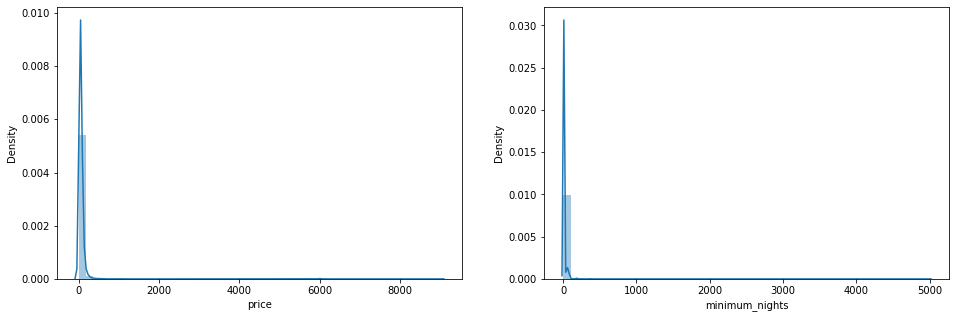

In [44]:
#let's look at the distribution plots of Price and Minimum nights
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.distplot(df['minimum_nights'])
plt.show()

In [45]:
#since there are no null values in neither Price and Minimum_nights, let's look if there are any 0 values,
#which ultimately are also to be cleaned. We will also need to clean NaN's in reviews_per_month
df[(df['price'] == 0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12621,18612697,Double room and kangaroos in Berlin,49435601,Svenja,Tempelhof - Schöneberg,Marienfelde,52.420357,13.366275,Private room,0,1,26,2018-10-07,1.43,1,124
14241,20218037,Your Room in a large Apartment Potsdamer Platz,83835882,Andi Und Maria,Mitte,Regierungsviertel,52.510657,13.379387,Private room,0,1,70,2018-10-25,5.11,3,10
14351,20317884,Beautiful apartment in Prenzlauer Berg,23943422,Stephan,Pankow,Prenzlauer Berg Süd,52.536574,13.429483,Entire home/apt,0,2,1,2017-09-04,0.07,3,0
14398,20382969,Bright and cosy private room in Friedrichshain,34385521,René,Friedrichshain-Kreuzberg,Frankfurter Allee Nord,52.521407,13.453777,Private room,0,4,1,2017-08-22,0.07,2,0
14469,20448073,*Nice and central room + own balcony in Kreuzb...,81030660,Isabell,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.490157,13.376745,Private room,0,1,0,NaN,NaN,3,0
14742,20671210,Modernes Superior Apartment in ruhiger Lage,1210739,TRIO Apartment Hotel,Marzahn - Hellersdorf,Marzahn-Süd,52.518930,13.525894,Entire home/apt,0,3,3,2018-09-25,0.67,17,343
14795,20717658,S12 Sonntagstraße Prenzlauer Berg,127309004,Kim,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.505838,13.465071,Entire home/apt,0,3,4,2018-07-27,0.32,4,230
15310,21154484,One bedroom in a cosy flat in the heart of Berlin,10246791,Jeanne,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.509413,13.460555,Private room,0,3,0,NaN,NaN,1,0


In [46]:
df[(df['minimum_nights'] == 0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [47]:
#there are a few 0 priced apartaments

# Feature Engineering

In [48]:
#let's clean the data and drop irrelevant columns. I'm dropping 'id', 'name', 'host_id' and 'host_name', because
#the data is huge and we don't need id columns. Also, there is a more accurate metrics for 'neighbourhood_group' in 
#'neighbourhood', and 'last_review' is a timestamp column.
df = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'last_review'], axis=1)

In [49]:
#let's look how it looks now
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,3.76,4,141
1,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,1.42,1,0
2,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,1.25,1,220
3,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,0.39,1,297
4,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,1.75,1,26


#### Data cleaning

In [50]:
#let's get rid of NaN's in reviews_per_month. We don't know if NaN's correspond to no reviews at all, so the safest will be
#to replace them with mean.
print(df['reviews_per_month'].mean())
df['reviews_per_month'] = df['reviews_per_month'].fillna(1.1385228497521018)

1.1355252709518189


In [51]:
#now, let's work with price and minimum_nights. In order to get rid of the outliers, I decided to use Z-score standardization.
#first, we need to check what are the allowed values.
print("Highest allowed price",df['price'].mean() + 3*df['price'].std())
print("Lowest allowed price",df['price'].mean() - 3*df['price'].std())
print("Most allowed nights",df['minimum_nights'].mean() + 3*df['minimum_nights'].std())
print("Least allowed nights",df['minimum_nights'].mean() - 3*df['minimum_nights'].std())

Highest allowed price 727.9422984579112
Lowest allowed price -593.6549625231826
Most allowed nights 129.15227822901832
Least allowed nights -114.83815974728722


In [52]:
#as we can see, these are values that lay 3 standard deviations away from the mean. we won't be needing negative values.
df = df[(df['minimum_nights'] < 129)]
df = df[(df['price'] < 728)]

In [53]:
#now, let's fill 0 price values with mean. There are only a few, so that wouldn't affect the dataset too much if the
#decision was inaccurate
print(df['price'].mean())
df['price'] = df['price'].replace(0, 58.64879703611123)
df['price'].describe()

58.64879703611123


count    22403.000000
mean        58.669740
std         47.764852
min          1.000000
25%         30.000000
50%         45.000000
75%         70.000000
max        666.000000
Name: price, dtype: float64

c:\users\erykw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\erykw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


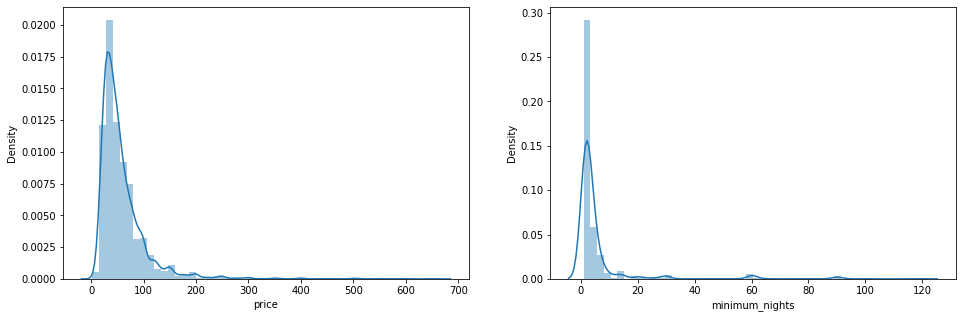

In [54]:
#let's look at the distribution plots again after cleaning up
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.distplot(df['minimum_nights'])
plt.show()

In [55]:
#distplots still don't look good. There, I decided to clip the values at a certain threshold.
#we are not interested in apartaments with e.g. historic background etc., so apartaments priced > 200 per night are in my
#opinion irrelevant for tourists. Same goes for minimum_nights. We are not interested in such long stays, so
#I clipped price at 200 and minimum_nights at 20.
df['price'] = df['price'].clip(10, 200)
df['minimum_nights'] = df['minimum_nights'].clip(1,20)

In [56]:
#let's describe the df again
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22403.000000,22403.000000,22403.000000,22403.000000,22403.000000,22403.000000,22403.000000,22403.000000
mean,52.509821,13.406213,56.915556,4.126144,17.906218,1.138523,1.906352,78.938535
std,0.030854,0.057965,37.677938,4.771427,36.852521,1.373659,3.662556,118.736918
min,52.345803,13.103557,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,52.489015,13.375670,30.000000,2.000000,1.000000,0.220000,1.000000,0.000000
50%,52.509101,13.416871,45.000000,2.000000,5.000000,0.840000,1.000000,3.000000
75%,52.532675,13.439313,70.000000,4.000000,16.000000,1.180000,1.000000,127.000000
max,52.651670,13.757642,200.000000,20.000000,498.000000,36.670000,45.000000,365.000000


c:\users\erykw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\erykw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


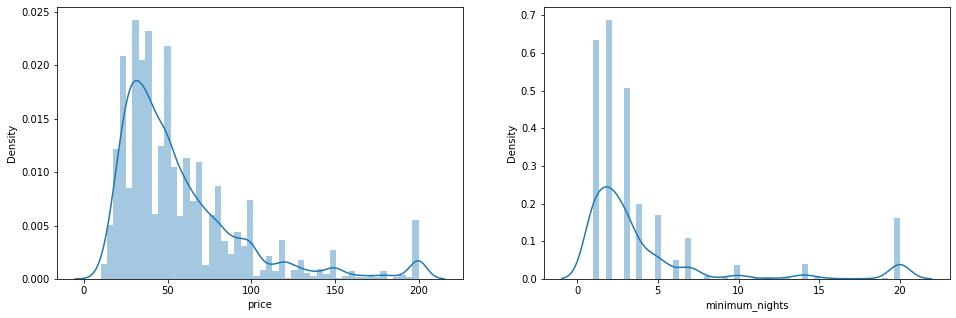

In [57]:
#we can see that there are no more outliers. let's plot the distribution once more
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.distplot(df['minimum_nights'])
plt.show()

In [58]:
#this looks better.
#now, since this is a regression model, we need to dummify neighbourhoods and room_types
df = pd.get_dummies(df, columns=['neighbourhood', 'room_type'])

In [59]:
#let's take a final look at the dataframe
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Adlershof,neighbourhood_Albrechtstr.,...,neighbourhood_Westend,neighbourhood_Wiesbadener Straße,neighbourhood_Wilhelmstadt,neighbourhood_Zehlendorf Nord,neighbourhood_Zehlendorf Südwest,neighbourhood_nördliche Luisenstadt,neighbourhood_südliche Luisenstadt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,52.534537,13.402557,60.0,4,118,3.760000,4,141,0,0,...,0,0,0,0,0,0,0,1,0,0
1,52.548513,13.404553,17.0,2,6,1.420000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,52.534996,13.417579,90.0,20,143,1.250000,1,220,0,0,...,0,0,0,0,0,0,0,1,0,0
3,52.498855,13.349065,26.0,5,25,0.390000,1,297,0,0,...,0,0,0,0,0,0,0,0,1,0
4,52.543157,13.415091,42.0,2,197,1.750000,1,26,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,52.533865,13.400731,60.0,2,0,1.138523,1,314,0,0,...,0,0,0,0,0,0,0,1,0,0
22548,52.496211,13.341738,20.0,1,0,1.138523,6,78,0,0,...,0,0,0,0,0,0,0,0,0,1
22549,52.531800,13.411999,85.0,3,0,1.138523,2,15,0,0,...,0,0,0,0,0,0,0,1,0,0
22550,52.520802,13.378688,99.0,1,0,1.138523,3,6,0,0,...,0,0,0,0,0,0,0,0,1,0


# Building the model

In [60]:
#assign X and y
X = df.drop('price', axis=1)
y = df['price']

In [61]:
#split the data into train and test. let's also shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [62]:
#to make it easier for the model to compile, let's use Standard Scaler on train and test splits
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [63]:
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [66]:
#now let's build the actual neural network. I am using sequential model and dense layers, l2 regularization to punish weights
#and rectifier as an activation function. We will use mean_absolute_error as the loss function, since there are no negative
#values, and 'adam' as an optimizer
model = Sequential()
model.add(layers.Dense(128, input_dim=146, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model.add(layers.Dense(3, activation='relu'))

model.compile(loss='mean_absolute_error',
             optimizer='adam')

Epoch 1/150
628/628 [==============================] - 2s 1ms/step - loss: 31.9676 - val_loss: 20.1620
Epoch 2/150
628/628 [==============================] - 1s 1ms/step - loss: 19.5306 - val_loss: 19.9424
Epoch 3/150
628/628 [==============================] - 1s 1ms/step - loss: 19.5867 - val_loss: 19.8902
Epoch 4/150
628/628 [==============================] - 1s 1ms/step - loss: 19.2456 - val_loss: 19.9067
Epoch 5/150
628/628 [==============================] - 1s 1ms/step - loss: 19.6445 - val_loss: 19.9010
Epoch 6/150
628/628 [==============================] - 1s 1ms/step - loss: 19.1803 - val_loss: 19.8554
Epoch 7/150
628/628 [==============================] - 1s 1ms/step - loss: 19.3355 - val_loss: 19.7208
Epoch 8/150
628/628 [==============================] - 1s 1ms/step - loss: 19.0074 - val_loss: 19.9426
Epoch 9/150
628/628 [==============================] - 1s 1ms/step - loss: 19.9041 - val_loss: 19.6947
Epoch 10/150
628/628 [==============================] - 1s 1ms/step - los

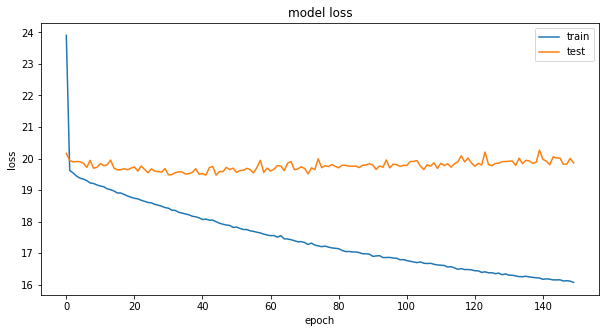

In [67]:
#let's compile
hist = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=150, batch_size=25)

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()